In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


In [2]:
penguins = sns.load_dataset("penguins")
print(f"Total number of elements before dropping missing values: {len(penguins)}")

penguins_cleaned = penguins.dropna()
print(f"Total number of elements after dropping missing values: {len(penguins_cleaned)}")


Total number of elements before dropping missing values: 344
Total number of elements after dropping missing values: 333


In [3]:
print(penguins_cleaned.dtypes)
print(penguins_cleaned.head())
print(penguins_cleaned.describe())

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.9

In [8]:
features = penguins_cleaned.drop(columns=['species'])
target = penguins_cleaned['species']

print(features.head())
print("____________")
print(target.head())
print("____________")

features_encoded = pd.get_dummies(features) # Perform one-hot encodling on categorical features

print(features_encoded.head())

      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Torgersen            39.1           18.7              181.0       3750.0   
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
4  Torgersen            36.7           19.3              193.0       3450.0   
5  Torgersen            39.3           20.6              190.0       3650.0   

      sex  
0    Male  
1  Female  
2  Female  
4  Female  
5    Male  
____________
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object
____________
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0  

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(f"Total number of elements in the cleaned penguins DataFrame: {penguins_cleaned.size}")


Total number of elements in the cleaned penguins DataFrame: 2331


In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

###  Display the explained variance ratio using a bar graph


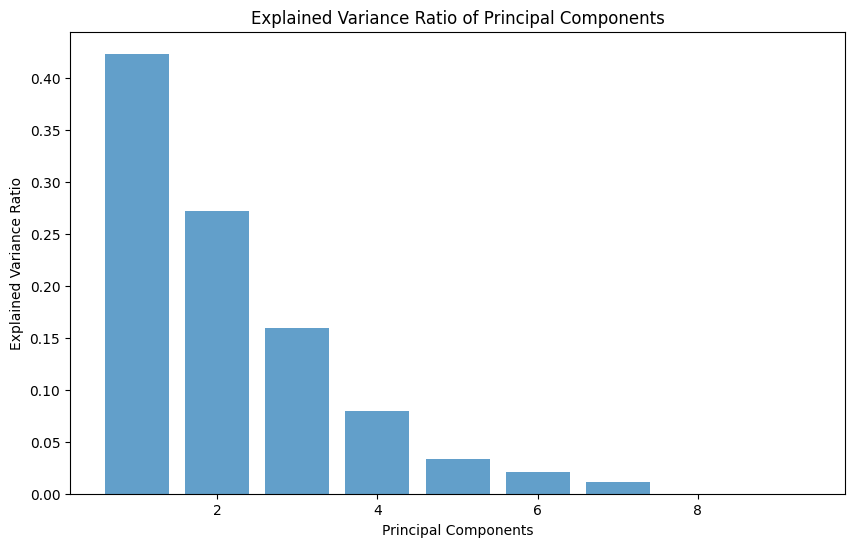

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()



### Plot the first two principal components in a scatter plot with colours indicating the target variable


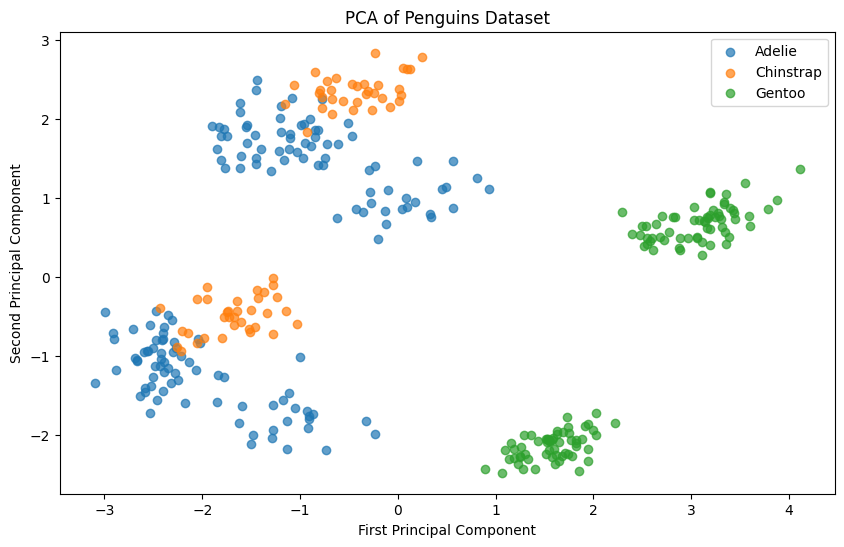

In [17]:
plt.figure(figsize=(10, 6))
for species in np.unique(target):
    plt.scatter(X_pca[target == species, 0], X_pca[target == species, 1], label=species, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Penguins Dataset')
plt.legend()
plt.show()

### Generate a scree plot to show the cumulative explained variance by the principal components



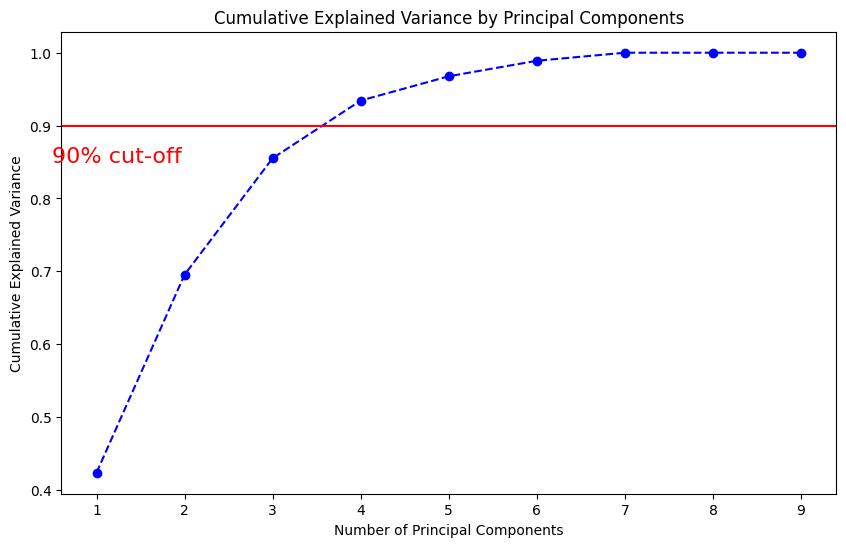

In [18]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off', color = 'red', fontsize=16)
plt.show()

### Determine the number of components that explain at least 90% of the variance


In [19]:
num_components_90_variance = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components that explain at least 90% of the variance: {num_components_90_variance}")

Number of components that explain at least 90% of the variance: 4
